In [ ]:
!pip install mglearn

     |████████████████████████████████| 542kB 7.6MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582638 sha256=34c88046c676e25f29d0b35770e455d7ad23501048086444442bc0a27845c23c
  Stored in directory: /root/.cache/pip/wheels/eb/a6/ea/a6a3716233fa62fc561259b5cb1e28f79e9ff3592c0adac5f0
Successfully built mglearn


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
import mglearn

In [ ]:
from google.colab import files
upload = files.upload()

Saving credit.csv to credit.csv


In [ ]:
filepath = 'credit.csv'
dataset = pd.read_csv(filepath, names=['balance', 'balance_frequency', 'purchases', 'oneoff_purchases', 'installments_purchases', 
                                       'cash_advance', 'purchases_frequency', 'oneoff_purchases_frequency', 'purchases_installments_frequency', 
                                       'cash_advance_frequency', 'cash_advance_trx', 'purchases_trx', 'credit_limit', 'payments', 'minimum_payments', 'full_payment', 'tenure'], skiprows=1)
dataset

,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,full_payment,tenure
0,-0.080006,-0.059089,-0.018512,-0.014534,-0.014030,-0.020766,-0.323684,-0.202458,-0.281104,-0.090096,-0.026413,-0.035502,-0.116676,-0.030191,-0.009485,-0.153715,0.080447
1,0.086015,0.031820,-0.020457,-0.014534,-0.018270,0.115918,-0.490351,-0.202458,-0.364437,0.076571,0.006107,-0.041089,0.083658,0.046724,0.002724,0.068507,0.080447
2,0.048872,0.122729,-0.004691,0.004434,-0.018270,-0.020766,0.509649,0.797542,-0.364437,-0.090096,-0.026413,-0.007569,0.100352,-0.021905,-0.003101,-0.153715,0.080447
3,0.005367,-0.240907,0.010110,0.022241,-0.018270,-0.016401,-0.407018,-0.119125,-0.364437,-0.034541,-0.018283,-0.038296,0.100352,-0.034170,NaN,-0.153715,0.080447
4,-0.039214,0.122729,-0.020131,-0.014142,-0.018270,-0.020766,-0.407018,-0.119125,-0.364437,-0.090096,-0.026413,-0.038296,-0.109998,-0.020796,-0.008107,-0.153715,0.080447
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,-0.080658,0.122729,-0.014521,-0.014534,-0.005331,-0.020766,0.509649,-0.202458,0.468896,-0.090096,-0.026413,-0.024329,-0.116676,-0.027751,-0.010671,0.346285,-0.919553
8946,-0.081147,0.122729,-0.014340,-0.014534,-0.004936,-0.020766,0.509649,-0.202458,0.468896,-0.090096,-0.026413,-0.024329,-0.116676,-0.028731,NaN,-0.153715,-0.919553
8947,-0.080926,-0.043938,-0.017512,-0.014534,-0.011852,-0.020766,0.342982,-0.202458,0.302230,-0.090096,-0.026413,-0.027122,-0.116676,-0.032568,-0.010232,0.096285,-0.919553
8948,-0.081448,-0.043938,-0.020457,-0.014534,-0.018270,-0.019991,-0.490351,-0.202458,-0.364437,0.021015,-0.010153,-0.041089,-0.133371,-0.033134,-0.010581,0.096285,-0.919553


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   balance                           8950 non-null   float64
 1   balance_frequency                 8950 non-null   float64
 2   purchases                         8950 non-null   float64
 3   oneoff_purchases                  8950 non-null   float64
 4   installments_purchases            8950 non-null   float64
 5   cash_advance                      8950 non-null   float64
 6   purchases_frequency               8950 non-null   float64
 7   oneoff_purchases_frequency        8950 non-null   float64
 8   purchases_installments_frequency  8950 non-null   float64
 9   cash_advance_frequency            8950 non-null   float64
 10  cash_advance_trx                  8950 non-null   float64
 11  purchases_trx                     8950 non-null   float64
 12  credit

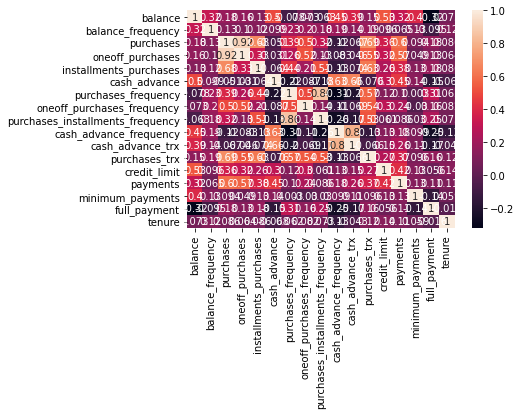

In [ ]:
cor_matrix = dataset.corr()
import seaborn as sn
sn.heatmap(cor_matrix, annot=True)

In [ ]:
col = ['full_payment', 'cash_advance']
dataset.loc[:,col]

,full_payment,cash_advance
0,-0.153715,-0.020766
1,0.068507,0.115918
2,-0.153715,-0.020766
3,-0.153715,-0.016401
4,-0.153715,-0.020766
...,...,...
8945,0.346285,-0.020766
8946,-0.153715,-0.020766
8947,0.096285,-0.020766
8948,0.096285,-0.019991


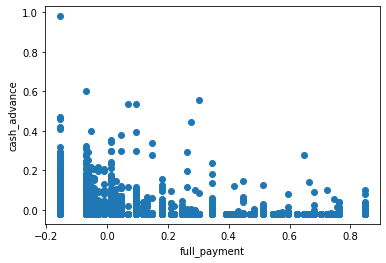

In [ ]:
x_axis = dataset[:]['full_payment']
y_axis = dataset[:]['cash_advance']

plt.xlabel('full_payment')
plt.ylabel('cash_advance')

plt.scatter(x_axis, y_axis)

In [ ]:
dataset.isnull().sum()

balance                               0
balance_frequency                     0
purchases                             0
oneoff_purchases                      0
installments_purchases                0
cash_advance                          0
purchases_frequency                   0
oneoff_purchases_frequency            0
purchases_installments_frequency      0
cash_advance_frequency                0
cash_advance_trx                      0
purchases_trx                         0
credit_limit                          1
payments                              0
minimum_payments                    313
full_payment                          0
tenure                                0
dtype: int64

In [ ]:
dbscan = DBSCAN(eps=0.045)
cluster = dbscan.fit_predict(dataset.loc[:,col])
print(np.unique(cluster))

[-1  0  1  2  3  4]


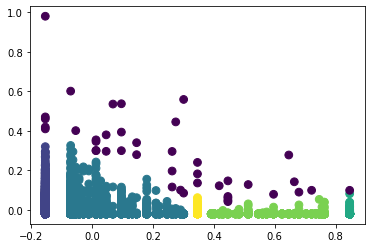

In [ ]:
plt.scatter(dataset['full_payment'], dataset['cash_advance'], c=cluster, s=60)

In [ ]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(dataset.loc[:,col])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
print(np.unique(kmeans.labels_))

[0 1 2]


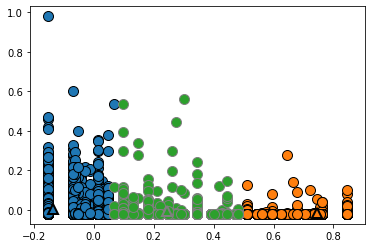

In [ ]:
mglearn.discrete_scatter(dataset['full_payment'], dataset['cash_advance'], kmeans.labels_, markers='o')
mglearn.discrete_scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],[0,1,2], markers='^', markeredgewidth=2)

In [ ]:
clustering = AgglomerativeClustering(n_clusters=3)
clustering.fit(dataset.loc[:,col])
print(np.unique(clustering.labels_))

[0 1 2]


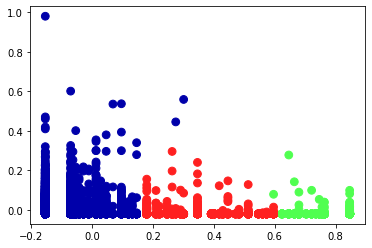

In [ ]:
plt.scatter(dataset['full_payment'], dataset['cash_advance'], c=clustering.labels_, cmap=mglearn.cm3, s=60)